### CASE STUDY: CUSTOMER ANALYSIS FOR RETAIL

### Create a report and display the below calculated metrics, reports and inferences.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import re
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
customer = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 1 - Retail Case Study\Customer.csv")
transactions = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 1 - Retail Case Study\Transactions.csv")
prod_cat_info = pd.read_csv(r"D:\Data Analyssis\Python\Case studies\Case Study 1 - Retail Case Study\prod_cat_info.csv")

In [3]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
transactions = transactions.rename(columns = {'cust_id':'customer_Id', 'prod_subcat_code':'prod_sub_cat_code'})

In [6]:
transactions.head(2)

,transaction_id,customer_Id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


In [7]:
customer_transactions = pd.merge(customer, transactions, on='customer_Id', how='inner')

customer_final = pd.merge(customer_transactions, prod_cat_info, on=['prod_cat_code', 'prod_sub_cat_code'], how='inner')

In [8]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [9]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   tran_date          23053 non-null  object 
 6   prod_sub_cat_code  23053 non-null  int64  
 7   prod_cat_code      23053 non-null  int64  
 8   Qty                23053 non-null  int64  
 9   Rate               23053 non-null  int64  
 10  Tax                23053 non-null  float64
 11  total_amt          23053 non-null  float64
 12  Store_type         23053 non-null  object 
 13  prod_cat           23053 non-null  object 
 14  prod_subcat        23053 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


In [10]:
customer_final.isnull().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
tran_date            0
prod_sub_cat_code    0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_subcat          0
dtype: int64

In [11]:
customer_final.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23048    False
23049    False
23050    False
23051    False
23052    False
Length: 23053, dtype: bool

### 2. Prepare a summary report for the merged data set.
### 2. a. Get the column names and their corresponding data types

In [12]:
customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
tran_date             object
prod_sub_cat_code      int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_subcat           object
dtype: object

In [13]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

In [14]:
customer_final['tran_date'].head(5)

0   2014-01-13
1   2011-03-25
2   2011-05-23
3   2013-09-12
4   2013-05-23
Name: tran_date, dtype: datetime64[ns]

In [15]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'])

In [16]:
customer_final['DOB'].head(5)

0   1970-02-01
1   1970-01-16
2   1970-01-18
3   1970-01-22
4   1970-01-29
Name: DOB, dtype: datetime64[ns]

In [17]:
customer_final.dtypes

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
tran_date            datetime64[ns]
prod_sub_cat_code             int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_subcat                  object
dtype: object

### 2.b. Top/Bottom 10 observations

In [18]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [19]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


### 2. c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [20]:
customer_final.describe()

,customer_Id,city_code,transaction_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [85]:
# 5-point sumary
customer_final.describe(include='all')   # Generating descriptive statistics for all columns (numerical and categorical)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
count,23053.000000,23053,23044,23045.000000,2.305300e+04,23053,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053,23053,23053
unique,NaN,3987,2,NaN,NaN,1129,NaN,NaN,NaN,NaN,NaN,NaN,4,6,18
top,NaN,1988-12-27 00:00:00,M,NaN,NaN,2011-07-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,e-Shop,Books,Women
freq,NaN,32,11811,NaN,NaN,35,NaN,NaN,NaN,NaN,NaN,NaN,9311,6069,3048
first,NaN,1970-01-02 00:00:00,NaN,NaN,NaN,2011-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,1992-12-29 00:00:00,NaN,NaN,NaN,2014-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,271021.746497,NaN,NaN,5.482534,5.007348e+10,NaN,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,NaN,NaN,NaN
std,2431.692059,NaN,NaN,2.863499,2.898194e+10,NaN,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,NaN,NaN,NaN
min,266783.000000,NaN,NaN,1.000000,3.268991e+06,NaN,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,NaN,NaN,NaN
25%,268935.000000,NaN,NaN,3.000000,2.493864e+10,NaN,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,NaN,NaN,NaN


### 2. d. Frequency tables for all the categorical variables

In [21]:
categorical_cols = customer_final.select_dtypes(include=['object'])

for col in categorical_cols.columns:
    frequency_table = customer_final[col].value_counts()          #frequency tables for each categorical column
    print(f"\nFrequency Table for '{col}':\n{frequency_table}")


Frequency Table for 'Gender':
M    11811
F    11233
Name: Gender, dtype: int64

Frequency Table for 'Store_type':
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

Frequency Table for 'prod_cat':
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

Frequency Table for 'prod_subcat':
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

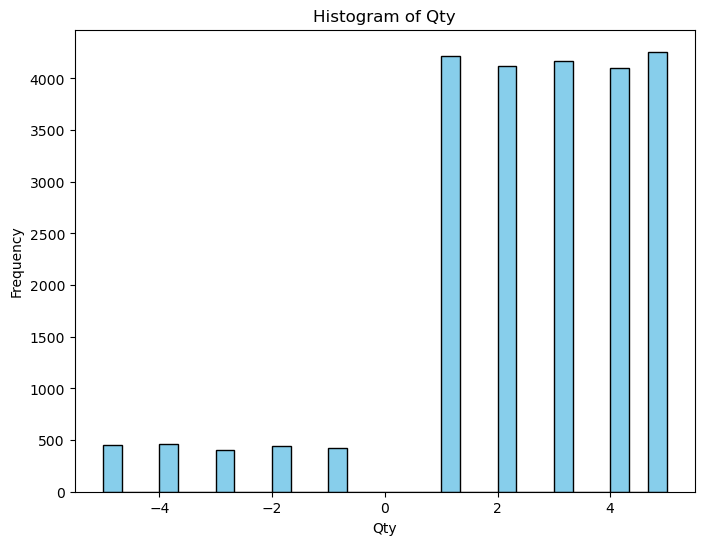

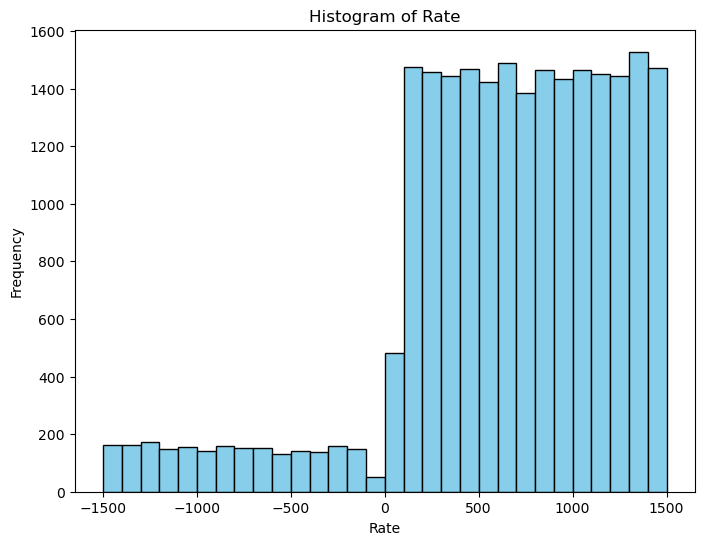

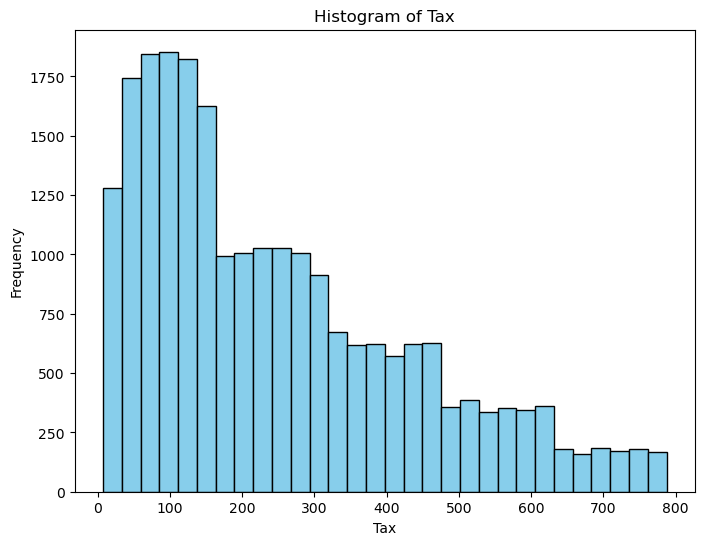

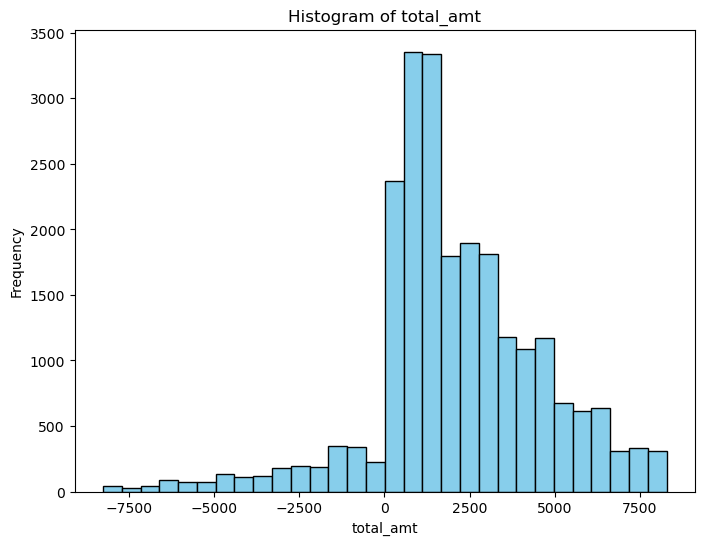

In [22]:
continuous_cols = ['Qty', 'Rate', 'Tax', 'total_amt'] 
# Generate histograms for continuous variables
for col in continuous_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(customer_final[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

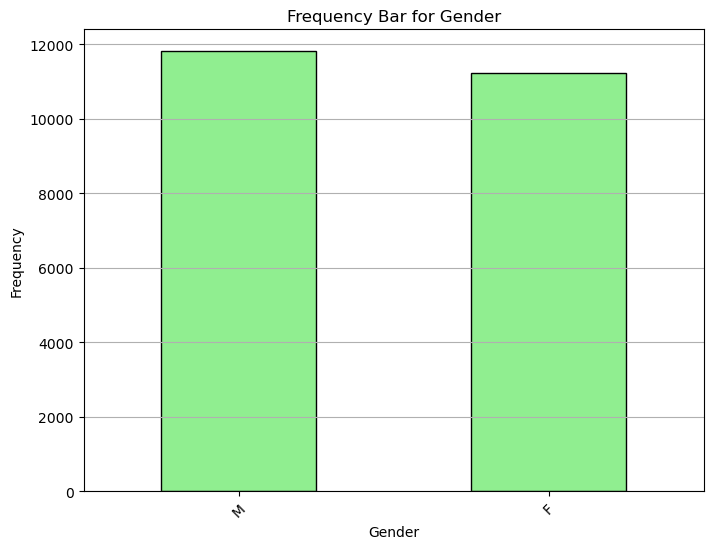

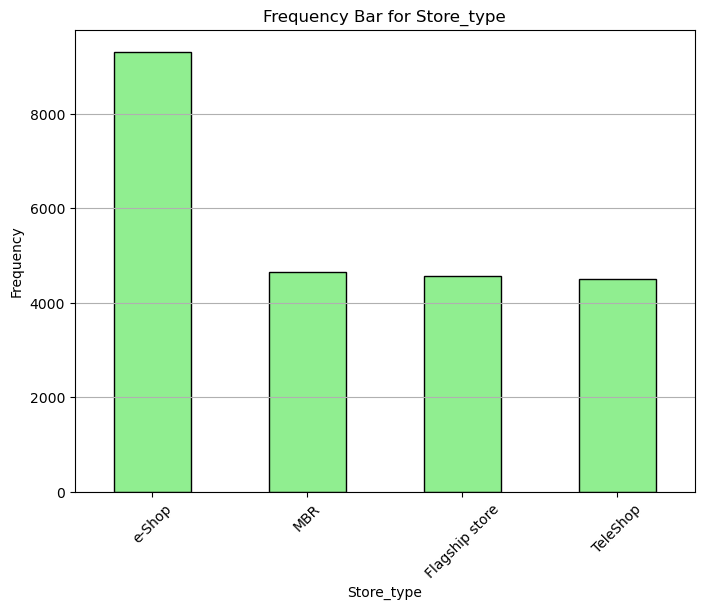

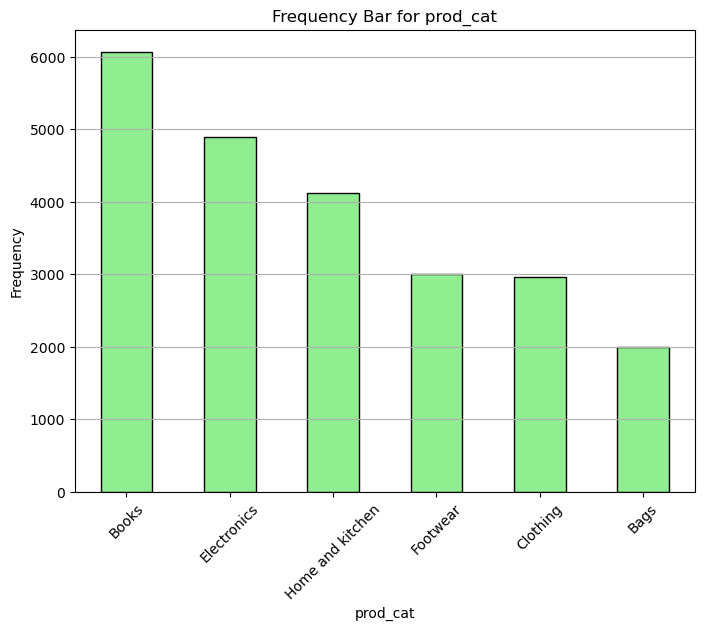

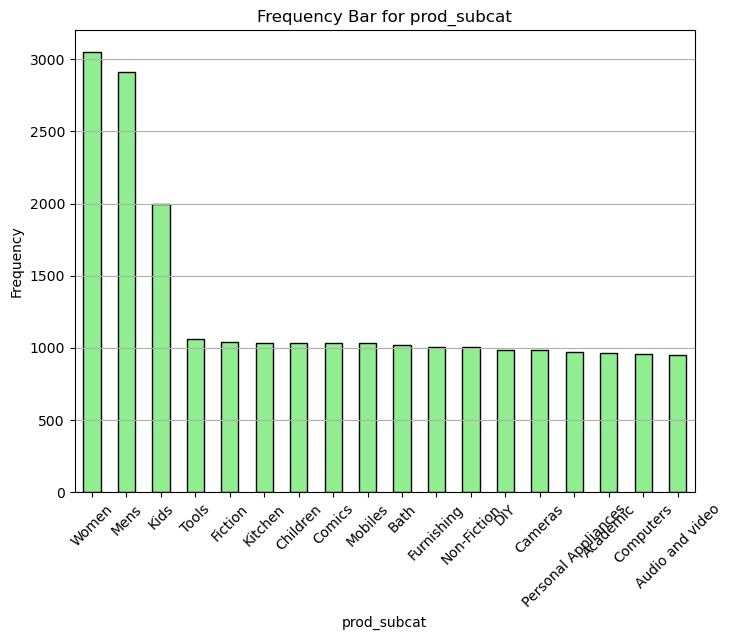

In [23]:
categorical_cols = ['Gender', 'Store_type', 'prod_cat', 'prod_subcat']  

# Generate frequency bars for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    freq_table = customer_final[col].value_counts()
    freq_table.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Bar for {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

### 4. Calculate the following information using the merged dataset :
### a. Time period of the available transaction data

In [24]:
earliest_date = customer_final['tran_date'].min()
latest_date = customer_final['tran_date'].max()

time_period = latest_date - earliest_date

print(f"Earliest Transaction Date: {earliest_date}")
print(f"Latest Transaction Date: {latest_date}")
print(f"Time Period of Available Transaction Data: {time_period}")

Earliest Transaction Date: 2011-01-02 00:00:00
Latest Transaction Date: 2014-12-02 00:00:00
Time Period of Available Transaction Data: 1430 days 00:00:00


### 4.b. Count of transactions where the total amount of transaction was negative

In [25]:
(customer_final['total_amt'] < 0).sum()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [26]:
customer_final.groupby(['Gender', 'prod_cat']).size().unstack().fillna(0).T.idxmax()

Gender
F    Books
M    Books
dtype: object

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [27]:
customer_final['city_code'].value_counts(normalize=True).head().rename_axis('City_code').reset_index(name='Percentage')

,City_code,Percentage
0,4.0,0.105099
1,3.0,0.104621
2,5.0,0.102408
3,7.0,0.102235
4,10.0,0.101237


In [28]:
customer_final['city_code'].value_counts(normalize=True).head(1).rename_axis('City_code').reset_index(name='Percentage')

,City_code,Percentage
0,4.0,0.105099


### 7. Which store type sells the maximum products by value and by quantity?

In [29]:
customer_final[['Qty','total_amt','Store_type']].groupby('Store_type').sum().sort_values(['total_amt','Qty'],ascending = False).head(1)

,Qty,total_amt
Store_type,,
e-Shop,22763,19824816.05


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [30]:
customer_final[(customer_final['prod_cat'].isin(['Electronics', 'Clothing'])) & (customer_final['Store_type'] == 'Flagship store')]['total_amt'].sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [31]:
customer_final[(customer_final['prod_cat'] == 'Electronics') & (customer_final['Gender'] == 'M')]['total_amt'].sum()

5703109.425

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [32]:
customer_final[customer_final['total_amt'] >= 0].groupby('customer_Id')['transaction_id'].nunique().gt(10).sum()

6

### 11. For all customers aged between 25 - 35, find out: 
###  a. What was the total amount spent for “Electronics” and “Books” product categories?

In [33]:
# Assuming 'customer_final' is the merged dataframe

# Filter for customers aged between 25 - 35 and specific product categories
filtered_customers = customer_final[(customer_final['DOB'].dt.year.between(1988, 1998)) &
                                    (customer_final['prod_cat'].isin(['Electronics', 'Books']))]

# Calculate the total amount spent for these customers and categories
total_amount_spent = filtered_customers['total_amt'].sum()
print(f"Total amount spent on Electronics and Books by customers aged 25-35: {total_amount_spent}")


Total amount spent on Electronics and Books by customers aged 25-35: 4939932.335


In [34]:
customer_final[(customer_final['DOB'].dt.year.between(1988, 1998)) & (customer_final['prod_cat'].isin(['Electronics', 'Books']))]['total_amt'].sum()
## the year range (1988 to 1998) in the between() function to match the age range 25 - 35 

4939932.335

### 11. b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [35]:
customer_final[(customer_final['DOB'].dt.year.between(1988, 1998)) & 
               (customer_final['tran_date'].between('2014-01-01', '2014-03-01'))]['total_amt'].sum()

377575.18500000006